In [2]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

from sympy import *
import scipy as sc
import numpy as np
init_printing()

# Introduction

In this notebook I run through the theory asociated with the microbial competition experiments done by Gab and Paqui. The basic idea is to develop a model which describes the temperature dependence of respiratory flux in communities with interacting species. This requires the model to not only describe the temperature dependence of metabolism itself (as classic MTE does) but also the change in flux that occurs due to the temperature dependence of species interactions. 

First I show how the temperature dependence of total respiratory flux of a population can be approximated assuming a temperature dependence of growth rate. I then describe growth in communities in multiple non-interacting species before moving to communities with species interactions. Like the expermental work I focus mainly on the exponential growth phase here though I do consider the effects of density dependence below. 

# Single Species model

First I will show how the temperature dependence of total respiratory flux of a population can be derived from the temperature dependence of its mass-specific respiration and carbon biomass growth. The total respiratory flux of carbon for a single species popualtion $i$ is equal to it's mass specific flux times its biomass

\begin{align}
    R_i = C_i \tilde{R}_i
\end{align}

where $R_i$ is the total respiratory flux of species $i$, $C_i$ the carbon biomass and $\tilde{R}$ the mass-specific respiratory flux. In order to determine the temperature dependence of total flux we need to work out the temperature dependence of both the biomass and mass-specific respiration. 

## Temperature dependence of respiration

Obtaining the temperature dependence of respiration ($\tilde{R}_i$) is easy as we can simply use the Arrhenius equation to represent the respiratory rate:

\begin{align}
    \tilde{R}_i(T) = \tilde{R_i}_0 e^{-E_\tilde{R_i} (T_r - T_{ra})}
\end{align}

where $\tilde{R}_i(T)$ is the respiration at temperature $T$, $\tilde{R}_{i_0}$ is respiration at some reference temperature, $E_{\tilde{R}_i}$ is the the tempeature sensitivty of respiration and $T_r$ and $T_{ra}$ are the Boltzmann corrected temperature and reference temperature respectively (<mark>$T \to\frac{1}{kT}$</mark>). Thus the equation for total flux becomes:

\begin{align}
    R_i = C_i \tilde{R_i}_0 e^{-E_\tilde{R_i} (T_r - T_{ra})}
\end{align}

## Temperature dependence of biomass

Obtaining the temperature dependence of carbon biomass is more difficult as biomass is not directly dependent on temperature. Instead temperature affects the rate of biomass change in the population meaning that its effects are time dependent. Thus, we must also account for time when looking at the temperature dependence of biomass. I start with a basic model of bacterial growth similar to that presented in Manzoni & Porporato ([2009](https://www.sciencedirect.com/science/article/pii/S0038071709000765)):

<img src="figures/growthmodel/growthmodel.png" width = "400px">

<mark>*The figure is a bit confusing; the $R_g$ term looks like an inefficiency, but only later do you say that it is an inefficiency*</mark>

| Symbol        | Description                            | 
|---------------|----------------------------------------|
| $C_E$         | Environmental carbon concentration     |
| $C_i$         | Bacterial carbon biomass concentration |
| $\tilde{U}$   | Gross mass-specific carbon uptake      |
| $\tilde{R}_G$ | Mass-specific growth respiration       |
| $\tilde{R}_M$ | Mass-specific maintenance respiration  |

Here carbon is taken up from the enviroment $C_E$ through carbon uptake $U$ of which some is lost via growth respiration $R_g$. Carbon is also lost from bacterial biomass $C_i$ via maintenance respiration $R_m$. We can write the total equation for bacterial biomass as:

\begin{align}
    \frac{1}{C_i} \frac{dC_i}{dt} = \tilde{U}_i - \tilde{R}_{g_i} - \tilde{R}_{m_i}
\end{align}

where the tilde notation again represents that these are mass-specific rates. Note that I assume that all carbon loss by bacteria occurs via respiration, with the loss occuring due to mortality and overflow (which is the loss of excess carbon due to stoichiometric constraints) being negligible. This model represents the simple exponential growth phase where resources are not limiting. 

### Uptake

In the model above uptake is represented as a single term $U$. Given that we are interested here in growth during the exponential phase I assume here that enviromental carbon is not limiting and that this uptake scales only with microbial biomass (i.e. $U = C_s \tilde{U}$). Thus, this mass-specific term represents the rate of uptake limited only by the mechanics of carbon uptake. This limitation can be thought of in two ways with uptake being controled either by the diffusion of carbon across the cell membrane (i.e [Aksnes & Egge (1991)](https://www.int-res.com/articles/meps/70/m070p065.pdf)) or by the avalibility of extracellular enzymes to break down carbon substrates (as discussed in Manzoni & Porporato [(2009)](https://www.sciencedirect.com/science/article/pii/S0038071709000765)).

#### Diffusion limitation

#### Enzyme limitation

In the enzyme limited frame work we assume that the uptake of carbon is limited by the ability of bacteria to decompose external carbon substrates. This process is catalysed by enzymes and can be described by Michaelis–Menten kinetics:

\begin{align}
    \tilde{U} = \tilde{U}_{max} \frac{C_E}{C_E + K_s}
\end{align}

where $\tilde{U}_{max}$ is the mass-specific maximum uptake rate which may be limted by factors other than substrate avaliblity (e.g. the diffusion limitation discussed above), $C_E$ is the mass of enviromental carbon and $K_s$ is the half saturation constant at which uptake is 50%. In the exponential phase we assume that carbon is not limiting such that $C_E \to \infty$ meaning that the value of $\frac{C_E}{C_E + K_s} \to 1$ and $\tilde{U} = \tilde{U}_{max}$. 

This process may be altered by temperature as the rates of reaction increase, altering the value of $K_s$.


<mark>*Let's discuss this bit*</mark>

### Respiration

Respiration here is represented in two terms $R_g$ and $R_m$ which occur due to growth and maintenence respectively. Growth respiration here represents the loss of carbon that occurs due to the energetic costs of growth and the inefficency of metabolising certain carbon sources ([Gommers et al. 1988](https://onlinelibrary.wiley.com/doi/abs/10.1002/bit.260320112)) whilst maintenance respiration represents the costs of processes such as protein and nucleic acid turnover, osmoregulation and motility ([Chapman & Grey 1986](https://www.sciencedirect.com/science/article/pii/0038071786900957)). I seperate these two types of respiration as it allows the different processes that lead to these carbon losses to be expressed fully across different states of bacterial growth. 

As growth respiration is associated with assimilating carbon uptake into biomass it should be related to the magnitude of uptake (i.e. $R_g = f(U)$). This relationship is most commonly assumed to be linear with a fixed proportion of uptake being lost via growth respiration, $R_g = p U$. The remainder of carbon uptake is then used for biomass growth ($\epsilon U$ where $\epsilon = 1 - p$). I assume here that maintenence respiration, the other source of carbon loss is constant, with the total carbon loss from maintenence being proportional to the amount of biomass (i.e. $R_m = C_s \tilde{R}_m$).

<mark>*Let's discuss this bit*</mark>

### Exponential model

Combining the observations above we can substitute growth respiration into the microbial growth model:

\begin{align}
    \frac{1}{C_s} \frac{dC_s}{dt} &= \tilde{U}_s - \tilde{R}_g -\tilde{R}_m \\
    &= \tilde{U}_s - (1-\epsilon)\tilde{U} -\tilde{R}_m \\
    &= \epsilon \tilde{U} -\tilde{R}_m
\end{align}

where the $\epsilon$ term accounts for the changing growth respiration as the rate of uptake changes.

### Experimental model

Though the model above represents the total model of bacteria growth it may be simplified further considering the experiments that have been conducted. In our experiments we are interested only in the exponential growth phase where carbon is not limiting and growth rates are at their maximum. As the rate of growth is theoretically constant over this period we can assume that the rate of uptake is constant too. As such the rate of growth respiration should be constant. Given this we can ignore the relationship between growth rate and uptake and instead revert to the earlier model: 
\begin{align}
    \frac{1}{C_s} \frac{dC_s}{dt} &= \tilde{U}_s - \tilde{R}_g -\tilde{R}_m
\end{align}

<mark>*Let's discuss this bit -- I am slightly confused. The equation below implies that growth is perfectly efficient, which cannot be true, exponential phase or not.*</mark>


Where we can simplify the respiration term to $\tilde{R} = \tilde{R}_g +\tilde{R}_m$ giving:

\begin{align}
    \frac{1}{C_s} \frac{dC_s}{dt} &= \tilde{U}_s - \tilde{R}
\end{align}

Of course this model becomes invalid once the value of $\tilde{U}$ changes and we need to account for the change in respiration growth. 

### A time dependent solution
For a single population we can use seperation of variables to get the general solution of this equation (i.e. the biomass of the population at time $t$):

\begin{align}
    C(t) &= C_0 e^{t (\tilde{U} - \tilde{R}) } \\
         &= C_0 e^{t  \tilde{U}} e^{- t \tilde{R}}
\end{align}

To get the temperature dependence of this process we need only substitute the Boltzmann equation for the $\tilde{U}$ and $\tilde{R}$ terms which gives:

\begin{align}
    C(t,T) = C_0 e^{t \tilde{U}_0 e^{-E_{\tilde{U}} (T_r - T_{ra})}} e^{- t  \tilde{R_m}_0 e^{-E_{\tilde{R_m}} (T_r - T_{ra})}}
\end{align}

In this form it is not possible to get an expression for the temperature dependence of growth (a single coefficent of $(T_r-T_{ra})$) due to the double exponentials. We can take the log and use a taylor expansion around the point $T_r = T_{ra}$ to get around this:

In [3]:
t,e,u_0,E_u,R_0,E_R,C_0,T_r,T_ra = var("t,\epsilon,u_0,E_u,R_0,E_R,C_0,T_r,T_ra")

gr = u_0 * exp(-E_u * (T_r - T_ra))
re = R_0 * exp(-E_R * (T_r - T_ra))

r_approx = exp(log(gr - re).series(T_r,T_ra,2).removeO())

C = C_0 * exp( t * (r_approx))
C_approx = exp(log(C).series(T_r,T_ra,2).removeO())
C_approx.simplify()

In [4]:
f = (E_R*R_0*R_0*t - E_R*R_0*u_0*t + E_u*u_0*u_0*t - E_u*u_0*R_0*t)/(R_0 - u_0)
f.simplify()

Thus the temperature dependence of biomass is approximately: 

\begin{align}
    E_C \approx E_{\tilde{R}} \tilde{R}_0 t - E_{\tilde{U}} \tilde{U}_0 t
\end{align}

#### Approximation Quality

We can evaluate the validity of this approximation numerically by looking at the difference between the exact solution and the approximation. Here I select a single parameterisation of the model and show the difference graphically:

<mark>*Weird that the lambidifed function could not handle the numpy array pf temperatures - check. Also, say "exact"  instead of "real"*</mark>

TypeError: only length-1 arrays can be converted to Python scalars

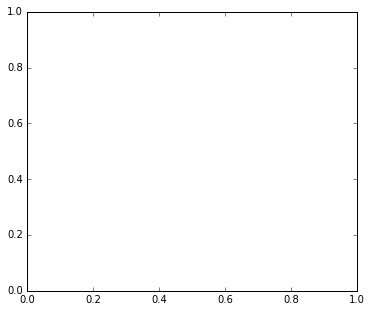

In [5]:
#define k
k = 8.6173303e-5
T = var("T")

C_real_p = log(C.subs({R_0:0.5,E_R:0.95,u_0:5.0,E_u:0.15,T_ra:1/(k*283.0),T_r:(1/(k*T)),t:10,C_0:1}))
C_approx_p = log(C_approx.subs({R_0:0.5,E_R:0.95,u_0:5.0,E_u:0.15,T_ra:1/(k*283.0),T_r:(1/(k*T)),t:10,C_0:1}))

C_app = lambdify(T,C_approx_p)
C_real = lambdify(T,C_real_p)

T_vec = 273.15 + np.arange(0, 30, 0.1)

fig = plt.figure(1,figsize=(13,5))

ax = fig.add_subplot(121)

ax.plot(T_vec,C_real(T_vec),label='Real')
ax.plot(T_vec,C_app(T_vec),label='Approximation')
ax.legend(loc='upper center')

ax = fig.add_subplot(122)
ax.plot(C_real(T_vec) - C_app(T_vec))

So the approximation appears to be good as long as the temperatures are low as we are ignoring the double exponential. This suits us as the use of the boltzmann means we ignore the decline in metabolic rate that occurs at higher temps. 

### Flux temperature dependence

Combining the approximation above with the temperature dependence of respiration we can rewrite the equation for total respiration as:

\begin{align}
    R_i \approx C_0 e^{-\tilde{R}_{0_i} t + \tilde{U}_{0_i} t +
                (E_{\tilde{R}_i} \tilde{R}_{0_i} t -
                 E_{U_i} \tilde{U}_{0_i} t)(T_r - T_{ra})} 
    \tilde{R}_{0_i} e^{-E_{\tilde{R}_i} (T_r - T_{ra})}
\end{align}

which means we can get the coefficient of $(T_r - T_{ra})$ for total respiration:

\begin{align}
    E_{R_i} &\approx -E_{\tilde{R}_i} + E_{\tilde{R}_i} \tilde{R}_{0_i}  t - E_{U_i} \tilde{U_i}_0 t\\
\end{align}

Looking at this equation we can see several (<mark> two!</mark>) interesting features of the model:

1. Increasing the sensitivity of $E_\tilde{R_i}$ will not always increase the sensitivity of total respiration due it it's negative effects on growth rates (Increasing the value of $E_{\tilde{R}_i}$ will only increase $E_{R_i}$ if $\tilde{R}_{0_i}  t > 1$).

2. Increasing the time ($t$) will increase the temperature sensitivity of total respiration (due to increase in biomass) but only if $E_{\tilde{R}_i} \tilde{R}_{0_i} < E_{U_i} U_{0_i}$

<mark>*As we have discussed before, think if this simple result might already be worth investigating empirically. However, Are these quantities feasibly measurable? And these conditions don't quite make sense to me -- let's discuss. Also, why focus on $E_{R_i}$ per se other than for mathematical convenience? And what does $\tilde{R}_{0_i} t$ mean? *</mark>

We can also combine the other parameters into a single normalisation constant:

\begin{align}
    R_{0_i} = C_{0_i} \tilde{R}_{0_i} e^{\tilde{U}_{0_i} t - \tilde{R}_{0_i} t}
\end{align}

allowing us to represent the population flux more simply as:

\begin{align}
   R_i =  R_{0_i} e^{E_{R_i}(T_r - T_{ra})} 
\end{align}

# Density dependence

The model above and it's derivation focus on the exponential growth for a single population. In reality there is likely to be density dependence as the biomass of these populations grow. These effects may be temperature dependent along with the growth parameters discussed above and thus will affect the respiration in the system. The growth model presented above:

\begin{align}
    \frac{dC_i}{dt} = C_i (\tilde{U}_i - \tilde{R}_i)
\end{align}

can be altered to include density dependence by adding either a phenomological intra-specific term or through explicit modeling of the shared resource pool. 

## Logistic equation

In the phenomological framework we need only add a single term to the model above to get the desired behaviour:

\begin{align}
    \frac{dC_i}{dt} = C_i (\tilde{U}_i - \tilde{R}_i - \alpha_{ii} C_i)
\end{align}

where $\alpha_{ii}$ is the intraspecifc interference and can be though of as the inverse of carrying capacity in classic logistic growth (i.e $\alpha_{ii} = \frac{1}{K}$)

## Equilibrium

We can solve the differential above at equilibrium by setting $\frac{dC_i}{dt} = 0$ which gives:

\begin{align}
    \hat{C}_i =  \frac{\tilde{U}_i - \tilde{R}_i}{\alpha_{ii}}
\end{align}

Including the temperature dependence of these rates/parameters gives:

\begin{align}
    \hat{C}_i &=  \frac{\tilde{U}_0 e^{-E_U (T_r - T_{ra})}}{\alpha_{ii_0} e^{-E_{\alpha_{ii}} (T_r - T_{ra})}} -
                 \frac{\tilde{R}_0 e^{-E_R (T_r - T_{ra})}}{\alpha_{ii_0} e^{-E_{\alpha_{ii}} (T_r - T_{ra})}} \\
                 \\
              &= \frac{\tilde{U}_0}{\alpha_{ii_0}} e^{E_{\alpha_{ii}}-E_U (T_r - T_{ra})} - 
                  \frac{\tilde{R}_0}{\alpha_{ii_0}} e^{E_{\alpha_{ii}}-E_R (T_r - T_{ra})}
\end{align}

So the temperature sensitivity of equilibrium biomass is reduced by the sensitivity of intraspecific interference. Note that this form assumes a monotonically increasing strenghth of intraspecific interactions with temperature. In the opposite case where temperature reduces the strength of intraspecfic interactions (i.e. $E_{\alpha_{ii}} < 0$) interactions will actually increase the strength of temperature dependence. Overall this means that the equilibrium biomass scales inversely with intraspecific temperature dependence:
\begin{align}
  \hat{C}_i 	\propto  e^{E_{\alpha_{ii}} (T_r - T_{ra})}
\end{align}

It is also worth noting that as long as the value of $\alpha_{ii}$ remains positive the equilibrium biomass will be above zero when $U-R > 0$

We can also consider a saturating function of intraspecific interference which follows the form:
    \begin{align}
        \alpha_{ii}(T) = \frac{a_{ii_{max}}}{1+\alpha_{ii_0}e^{E_{\alpha_{ii}} (T_r - T_{ra} )}}
    \end{align}
    
(note that the temperature dependence is inverted). Substituting this into the equation above we get:

\begin{align}
    \hat{C}_i &=  \frac{(\tilde{U}_0 e^{-E_U (T_r - T_{ra})} - \tilde{R}_0 e^{-E_R (T_r - T_{ra})})(1 + \alpha_{ii_0}e^{E_{\alpha_{ii}} (T_r - T_{ra} )})}{\alpha_{ii_{max}}}
\end{align}

again this means that the equilibrium biomass is predicted to decrease with increasing temperature with the sensitivity of $\alpha_{ii}$ affecting this relationship.

### Exact solution

We can also obtain an exact solution to population biomass using seperation of variables:

\begin{align}
C_i(t) = \frac{(\tilde{U}_i - \tilde{R}_i) e^{(\tilde{U}_i - \tilde{R}_i) t}} {a_{ii} e^{(\tilde{U}_i - \tilde{R}_i)t} + \frac{(\tilde{U}_i - \tilde{R}_i)}{C_{0_i}} - a_{ii}}
\end{align}

which has the temperature dependence:

\begin{align}
C_i(t,T) = \frac{(\tilde{U}_i(T) - \tilde{R}_i(T)) e^{(\tilde{U}_i(T) - \tilde{R}_i(T)) t}} {a_{ii}(T) e^{(\tilde{U}_i(T) - \tilde{R}_i(T))t} + \frac{(\tilde{U}_i(T) - \tilde{R}_i(T))}{C_{0_i}} - a_{ii}(T)}
\end{align}

This is alot more complex than the previous equations and hard to interperete analyticly. Instead we can use numerical simulations to visualise the effects of temperature on the growth curves:

<mark>*Why invoke the the shared resource approach here? With two populations, it fits into the multi-species model framework anyway, doesn't it? Or did you mean a single species density-dependent resource-uptake based biomass growth model? And how far do we want to go with density dependence here?*</mark>

# Multispecies model

In this section I will show how we can derive the temperature dependence of total system flux in multispecies communities. I first show how this is possible in two species communities without interactions before generalising to the n-species case and communities where interactions occur. 

## Non-interacting communities

In a system with two species and no interactions the total flux in the system can simply be described as the sum of the species level fluxes:

\begin{align}
        R_{tot} &= R_1 + R_2 \\
                &= R_{0_1} e^{E_{R_1}(T_r - T_{ra})} + R_{0_2} e^{E_{R_2}(T_r - T_{ra})} 
\end{align}

with the definitions detailed above. 

We can use the taylor expansion trick to convert this into a single TPC:

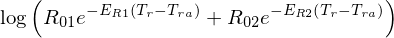

In [6]:
C_01,C_02,R_01,R_02 = var("C_{0_1},C_{0_2},R_{0_1},R_{0_2}")
T_r,T_ra = var("T_r,T_ra")

u_01,u_02 = var("\mu_{0_1},\mu_{0_2}")
E_R1, E_R2, E_u1, E_u2 = var("E_{R_1}, E_{R_2}, E_{u_1}, E_{u_2}")

g1,g2 = var("\gamma_1,\gamma_2")

E_R_1 , E_R_2 = var("E_{R_1},E_{R_2}")

R1 = R_01 * exp(-E_R_1*(T_r-T_ra))
R2 = R_02 * exp(-E_R_2*(T_r-T_ra))


R_tot = R1 + R2
log(R_tot)

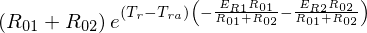

In [7]:
exp((log(R_tot).series(T_r,T_ra,2).removeO()))

This can simplified to the N-species case giving:

\begin{align}
    E_{R_{tot}} \approx \frac{\sum_{i=0}^{N} E_{R_i} R_{0_{i}} }{\sum_{i=0}^{N} R_{0_{i}}}
\end{align}

Which means that the temperature sensitivity of respiration in a non-interacting community is simply the weighted average of the individual populations. It is worth noting that all of these parameters have a time dependence, increasing exponentially as $t$ increases. 

We can also consider a continuious trait version of this where instead of $N$ descrete species we represent the community as a distribution across the different traits. For example in the growth model discussed above:
\begin{align}
    \frac{dC_i}{dt} = C_i (\tilde{U}_i - \tilde{R}_i - \alpha_{ii} C_i)
\end{align}

we can represent the boltzmann parameters of $\tilde{U}_i$,$\tilde{R}_i$ and $\alpha_{ii}$ as a joint distribution across the community (i.e. $P_{\theta}(\theta)$ is a probability density function where $\theta$ is a vector of $B_0$ and $E$ values for each trait$). 

<mark>*How far do we want to go with this line of investigation? Let's discuss.*</mark>

## Interacting communities

The key aim of this study is to demonstrate how ecological interactions alter flux at the ecosystem level by altering biomass dynamics in the system. In the framework shown here this can be thought of in terms of the general growth model:

\begin{align}
    \frac{1}{C_i}\frac{dC_i}{dt} = \tilde{U}_i - \tilde{R}_i
\end{align}

Though the mechanism of interaction is not clear from the experiments we can interperate the change in observed growth rate as an alteration of the rate of carbon uptake. This is much more likely to occur than a change in respiration which is assumed to mostly be a cost of maintence or growth. This interaction can be expressed in the model above as:

\begin{align}
    \frac{1}{C_i}\frac{dC_i}{dt} = \tilde{U}_i(C_i,C_2,\dots,C_n) - \tilde{R}_i
\end{align}

where $U_i$ is now a function of the biomass of other species in the system. We probably should include a change in the respiratory loss of carbon here (as changing uptake alters the amount of growth respiration) but for now we just alter the uptake rate. 

We assume that the effect of each species on growth rate can be represented as a simple additive effect such that $U_i = U_{i_0} + \sum^{n}_{j=0} C_j \alpha_{ij}$ where $\alpha_{ij}$ is the effect of species $j$ on the uptake rate of species $i$. In the two species case this can be written in full as:


\begin{align}
    \frac{1}{C_1}\frac{dC_1}{dt} &= \tilde{U}_1 - \tilde{R}_1 = \tilde{U}_{0_1} + C_2 \alpha_{12} - \tilde{R}_1\\
    \frac{1}{C_2}\frac{dC_2}{dt} &= \tilde{U}_2 - \tilde{R}_2 = \tilde{U}_{0_2} + C_1 \alpha_{21} - \tilde{R}_2
\end{align}

where the flux in the system is the same as in the non-interacting system above:

\begin{align}
R_{tot} = C_1 \tilde{R}_1 + C_2 \tilde{R}_2 \\
\end{align}

Though we have not derived an analytical solution of the temperature dependence of flux in this system yet the results of some simulations offer insight into the effects of these interactions on system flux. 

### Simulations

For the simulations I used measurements of the temperature dependence of growth and respiration from a number of bacterial species. I then calculated the rate of uptake ($r = U - R \to U = r + R$) and used this to parameterise the model above. I simulated the biomass dynamics of pairs of species over time at different levels of interaction (from facilitation to competition). As expected moving from facilitation to competitive interactions results in a redcution of growth rate and thus a reduction in biomass at any given timepoint:

<img src="figures/simulations/single_pair.png">



From these same simulations we can see how respiratory flux changes slower over time in more competitive communities:
<img src="figures/simulations/single_pair_time.png" width="400px">

And when simulated over multiple temperatures, how the response of respiration to temperature is altered as interactions change:
    <img src="figures/simulations/single_pair_temp.png" width = "400px">

I then chose 100 random pairs of species from the dataset and simulated their biomass growth across a range of temperatures and interaction strengths. The figure below shows the results of these simulations with each line representing a single species pair and the relationship between it's temperature response (a fitted $E_R$ value) and the interaction parameter (i.e. moving from competition when $\alpha < 0$ to facilitation when $\alpha > 0$).
<img src="figures/simulations/multi_pair_interaction.png">

The figure on the left shows the actual change in $E$ values over the range of interaction strengths whilst the figure on the right shows the change in $E$ values relative to the point where $\alpha = 0$. As we can see the general trend is for the temperature sensitivity of respiratory flux to increase as interactions move from competition to facilitation. This trend is dependent on the other factors affecting growth and respiration meaning that the strength of the relationship varies (as seen in the different slopes between species). 

### Mean field approximation

In the section above it is clear that the complexity of working with multiple interacting species makes analytic insight difficult. Instead of trying to calculate the exact solution (which is not possible) i will turn my efforts to a technique named the mean-field approximation. This method aims to characterise the average behviour of any species in the system by approximating the interactions between species as an average effect. I start with the basic Lotka–Volterra formulation of my growth model:

\begin{align}
   \frac{1}{C_i}\frac{dC_i}{dt} = U_i - R_i - \alpha_{ii}C_i - \sum_{i \neq j}^n\alpha_{ij}C_j
\end{align}

In the mean field approximation we replace the indivdual parameters of the growth model with random variables. We also assume that the individual effects of any single species on species $i$ are negligble such that we can approximate the interspecific interactions as: $\sum_{i \neq j}^n\alpha_{ij}C_j \approx \psi_i \mu_C$ where $\psi_i = \sum_{i \neq j}^n\alpha_{ij}$. This formulation works by assuming that the effect of interspecifc interactions can be approximated by the average effect of each pairwise effect. For now I also represent the intrisic growth rate of each population as single parameter $r = U - R$ to simplify notation. Also, note the absensence of the subscripts due to the representation of parameters and the biomass as random variables.

\begin{align}
   \frac{1}{C} \frac{dC}{dt} = r - \alpha C - \psi \mu_C
\end{align}

This has the equilibrium solution (or target density i.e. wilson 2003.) of:

\begin{align}
   C = \frac{r - \psi \mu_C}{\alpha}
\end{align}

using simple probabilty we can show that the mean and varience of $C$ are:

\begin{align}
       \mu_C &= \frac{\mu_r}{\mu_{\psi} + \mu_{\alpha}} \\ 
\end{align}

and if we assume independence of uptake, respiration and summed interaction strength:



###### Still need to work out varience 

#### Time dependent solution 

Having worked out the equlibrial moments we can also work out the explict time dependent moments of biomass (i.e $\mu_C(t)$ and $\sigma^{2}_{C}(t)$). I start here explaining the general approach to solve for these moments.

Given some system with random constant (not varying with time like brownian motion, for example) coeffiecents we can write the system as:

\begin{align}
    \frac{dC}{dt} = f(C(t),\mu_C(t),\theta)
\end{align}

where $C(t)$ is a random variable describing biomass, $\mu_C(t)$ is the time dependent average biomass and $\theta$ is a random vector containing the other variables ($r$,$\alpha$ and $\psi$). Normally we could obtain the raw moments of $C(t)$ by integrating across its PDF:

\begin{align}
    \mu_C^n(t)= \int C(t) \ p_C(C(t)) dC(t)
\end{align}

but this requires knowledge of the PDF at time $t$ which we do not have. Instead we can recognise that $C(t)$ can be writen as some function of $\mu_C$ and $\theta$ by integrating $f(\cdot)$ over time:

\begin{align}
    C(t) = \int f(C(t),\mu_C(t),\theta) dt = g(\mu_C(t),\theta)
\end{align}

thus the moments of $C(t)$ are equal to the moments of $g(\mu_C(t),\theta)$ and the equation above can be written as:

\begin{align}
    \mu_C^n(t)= \mu_{g(\mu_C(t),\theta)}^n = \int g(\mu_C(t),\theta)^n \ p_\theta(\theta) d\theta
\end{align}

so we can get the moments of $C(t)$ from the joint distributions of the parameters. Note that this methos relies on the existance of $g(\cdot)$ which should exist for most simple population growth models. This conclusion is relatively intuitive as it effectively says that if we have an explicit solution for biomass over time we can use this to get the moments at any time. 

##### The Meanfield Model

The problem with the meanfield model above is the inclusion of $\mu_C(t)$ in the growth function:

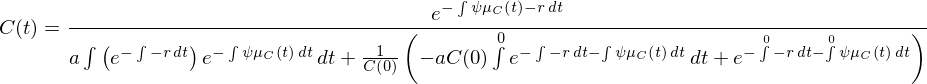

In [8]:
r,a,p,t = var("r,a,\psi,t",positive = true,real=true)
C = Function("C")(t)
uC = Function("mu_C")(t)
sol = dsolve(Eq(C.diff(t),C*(r - a*C - p*uC)))
C1 = sol.args[1].args[0].args[0].args[0]
C1_sol = solve(sol.subs({t:0}),C1)[0]
C_sol = sol.subs({C1:C1_sol}); C_sol

As we can see this prevents there from being a simple closed solution to $g(\cdot)$. 

##### Something about $E[\dot{C}(t)] = \dot{E[C]}(t)$  means we can get an equation for $\mu_C(t)$

For some reason the approximation:

\begin{align}
    \frac{dC}{dt} = C(r - \alpha C - \psi \bar{C}) \approx \bar{C}(\bar{r} - \bar{\alpha} \bar{C} - \bar{\psi} \bar{C})
\end{align}

seems to be pretty decent. I'm not quite sure as to how this can be justified mathematicly  but it may be related to the fact that the first moment of some function $f(X_1,X_2,\ldots,X_n)$ can be approximated using the taylor series:

\begin{align}
    E[f(X_1,X_2,\ldots,X_n)] \approx f(\bar{X_1},\bar{X_2},\ldots,\bar{X}_n)
\end{align}

If we can prove the equivelance (or approximate equivilence) of $E[\frac{dC}{dt}] = \frac{d}{dt} E[C]$ we can use this approximation. This may be related to Leibniz's rule for differntiation under the integration sign which states that:

\begin{align}
    \frac{d}{dt} \int_a^b f(x,t) dx = \int_a^b \frac{\partial}{\partial t} f(x,t) dx
\end{align}

In our case we can rewrite the derivative of the expectation ($\frac{d}{dt} E[C]$) as:

\begin{align}
   \frac{d}{dt} \int g(\mu_C(t),\theta) \ p_\theta(\theta) d\theta
\end{align}

and the expectation of the derivative ($E[\frac{dC}{dt}]$) as:
\begin{align}
   \int \frac{\partial}{\partial t} g(\mu_C(t),\theta) \ p_\theta(\theta) d\theta
\end{align}

So it is clear that Leibniz's rule, if applicable, may be helpful here.

###### Using this approximation
Assuming that this approximation makes sense we can use it to obtain an expression for $\mu_C(t)$:

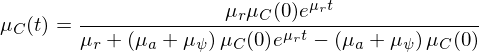

In [9]:
ur,ua,up = var("mu_r,mu_a,mu_psi",positive = true,real=true)
sr,sa,sp = var("sigma_r,sigma_a,sigma_psi",positive = true,real=true)
sol = dsolve(Eq(uC.diff(t),uC*(ur - ua*uC - up*uC)))
C1_sol = solve(sol.subs({t:0}),C1)[0]
uC_sol = simplify(sol.subs({C1:C1_sol}))
uC_sol

 This matches the result for the equilibrium mean above too: 

In [ ]:
limit(uC_sol.args[1],t,oo)

This is where I am stuck at the moment. This approximation seems to be reasonable within the range of parameters I have tested and working out the rational behind its use will (hopefully) allow me to improve its accuracy. I am stuck on how to solve for the second moment of biomass which is important. I belive that once that is obtained we will be able to fit a lognormal distribution to these moment which will approximate the distribution. This will allow us to go from the moments of species level thermal response parameters to the moments of biomass across time. From this we can work out distribution of flux in the community and it's moments too.

Below I have some workings describing how we can work out the distributions of rates given Arrhenius parameters and how this can be applyed to the meanfield equilibrium distributions. 

#### Deriving distributions of Arrhenius parameters 
Though we can use direct measures for the average and varience of each rates distribution in the equations above we can also derive them and their temperature dependence using the Arrhenius equation. If we have a community with temperature sensitvites distributed according the normal ditribution (i.e. $E$ is a random variable with $E \sim N(\mu_{E},\sigma_E)$) then the rates themseves become a new random variable described by:
\begin{align}
    Y = B_0 e^{-E(T_r - T_{ra})}
\end{align}

if we substitute $T_{diff} = T_r - T_{ra}$ and take the log of this new variable then we get:
\begin{align}
    log(Y) = log(B_0) -E(T_{diff})
\end{align}

which is normally distributed with $\mu = log(B_0) -\mu_E (T_{diff})$ and $\sigma^2 = \sigma_E^2 T_{diff}^2$. Thus the new variable $Y$ follows a lognormal distribution, described by the parameters above. The actual mean and varience of the lognormal distribution (which will written as $m$ and $v$ to avoid confution with the mean and varience of the normal distribution in the log scale) are given by: 
\begin{align}
    m = e^{\mu + \frac{\sigma^2}{2}} \ \ \ \ \ v = e^{2\mu + \sigma^2} (e^{\sigma^2} - 1)
\end{align}

which when we substitute the values in the log-scale (with their temperature dependence) the mean and varience of the rate become:
\begin{align}
    m &= B_0 e^{\frac{T_{diff}(T_{diff} \sigma_{E}^2 - 2\mu_E)}{2}} \\ 
    v &= B_0^2 \left(e^{T_{diff}^2 \sigma_{E}^2}-1 \right)e^{T_{diff}(T_{diff}\sigma_E^2 - 2\mu_E)}
\end{align}

We can also work out the skew and kurtosis:
\begin{align}
    \gamma &= (e^{T_{diff}^2 \sigma_{E}^2} + 2)\sqrt{e^{T_{diff}^2 \sigma_{E}^2} - 1}  \\
    \delta &= e^{4 T_{diff}^2 \sigma_{E}^2} + 2 e^{3 T_{diff}^2 \sigma_{E}^2} + 3^{2 T_{diff}^2 \sigma_{E}^2} - 6
\end{align}

#### The Meanfeild and Sum of Log-normals

As stated previously our equilibrium biomass is given by:

\begin{align}
   C = {U - R - \psi \bar{C}}
\end{align}

As each of these parameters follows a lognormal distribution we can approxmiate their sum as a seperate new log-normal distribtion. One of the most common analytical approximations used for this is the method detailed by [Fenton (1960)](https://ieeexplore.ieee.org/document/1097606) who use the first two moments of the sum to approximate the log-normal shape. Given that the mean and varience of a log-normal distribution are given by:
\begin{align}
    m = e^{\mu + \frac{\sigma^2}{2}} \ \ \ \ \ v = e^{2\mu + \sigma^2} (e^{\sigma^2} - 1)
\end{align}
 we can rearange to find the mean and varience of the underlying distribution:
\begin{align}
    \mu = log \left(\frac{m}{\sqrt{1+\frac{v}{m^2}}} \right) \ \ \ \ \ \sigma^2 = log \left( 1+\frac{v}{m^2} \right) 
\end{align}
which substituting in the mean and varience of $C$ gives:
\begin{align}
\mu &=  \log{\left (\frac{- \mu_R + \mu_U}{\sqrt{\frac{\sigma_P^{2} \left(\mu_R - \mu_U\right)^{2} + \left(\mu_P + 1\right)^{2} \left(\sigma_R^{2} + \sigma_U^{2}\right) + \left(\mu_R - \mu_U\right)^{2}}{\left(\mu_R - \mu_U\right)^{2}}} \left(\mu_P + 1\right)} \right )} \\
\sigma^2 &= \log{\left (\frac{\sigma_P^{2} \left(\mu_R - \mu_U\right)^{2} + \left(\mu_P + 1\right)^{2} \left(\sigma_R^{2} + \sigma_U^{2}\right) + \left(\mu_R - \mu_U\right)^{2}}{\left(\mu_R - \mu_U\right)^{2}} \right )}
\end{align}

##### Total respiratory flux

Having derived parameterisations for the distribution of equilibrium biomass density we can work out the distribution of equilibrium respiratory flux by looking at the distrbution created by $R_{tot} = C R$. As both $C$ and $R$ follow a lognormal distribution their product follows one two with:
\begin{align}
    \mu_{R_{tot}} = \mu_C + \mu_R
\end{align}

In [ ]:
f = C*(r-a*C - p*uC)
uC_app = f.subs({C:uC,r:ur,a:ua,p:up})
uC_app = dsolve(Eq(uC.diff(t),uC_app))
C1_sol = solve(uC_app.subs({t:0}),C1)[0]
uC_app = uC_app.subs({C1:C1_sol})
uC_app

In [ ]:
sC = Function("sigma_C")(t)
f2 = f.diff(C)**2 * sC**2 + f.diff(r)**2 * sr**2 + f.diff(a)**2 * sa**2 +f.diff(p)**2 * sp**2
sC_app = simplify(f2.subs({C:uC,r:ur,a:ua,p:up,uC:uC_app.args[1]}))
sC_app = simplify(sC_app)

In [ ]:
simplify(f2.subs({C:uC,r:ur,a:ua,p:up}))